# Exploratory Data Analysis (EDA):

## Three Important Steps To Keep In Mind Are:
1. Understand the data
2. Clean the data
3. Find relationship between data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

df = pd.read_csv(r"C:\Users\cw\Documents\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# 
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
# Shape of dataset

print("Number of rows/Instances:",df.shape[0])
print("Number of Columns/Variables:",df.shape[1])

Number of rows/Instances: 1000
Number of Columns/Variables: 8


In [7]:
# Summary Statistics

df.describe() 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# Column names

df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
# Number of unique

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
# Unique values in columns

df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

### Cleaning The Data 

In [16]:
# Checking for missing values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- Dropping race/ethnicity and parental level of education columns as they are not useful for our Analysis

In [18]:
# Dropping race/ethnicity and parental level of education columns
df1 = df.drop(["race/ethnicity", "parental level of education"], axis=1)

In [19]:
df1

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75
...,...,...,...,...,...,...
995,female,standard,completed,88,99,95
996,male,free/reduced,none,62,55,55
997,female,free/reduced,completed,59,71,65
998,female,standard,completed,68,78,77


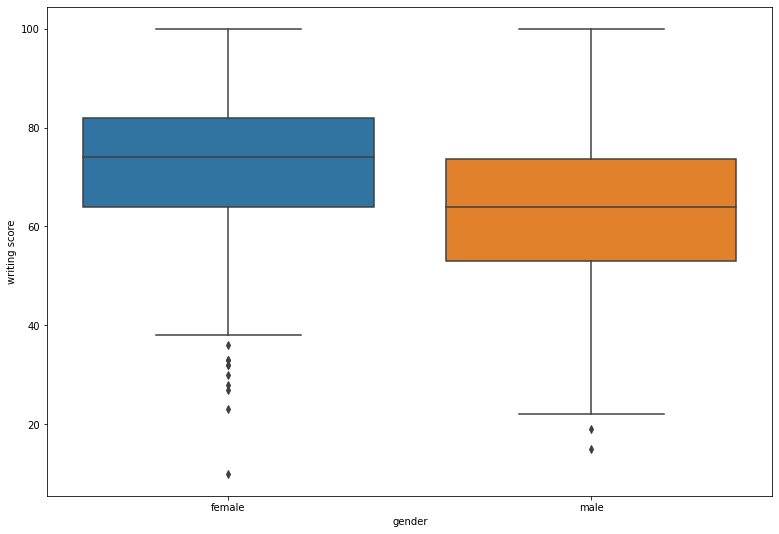

In [24]:
# Checking for outliers

plt.figure(figsize=(13, 9))
sns.boxplot(x="gender", y="writing score", data=df1)
plt.show()

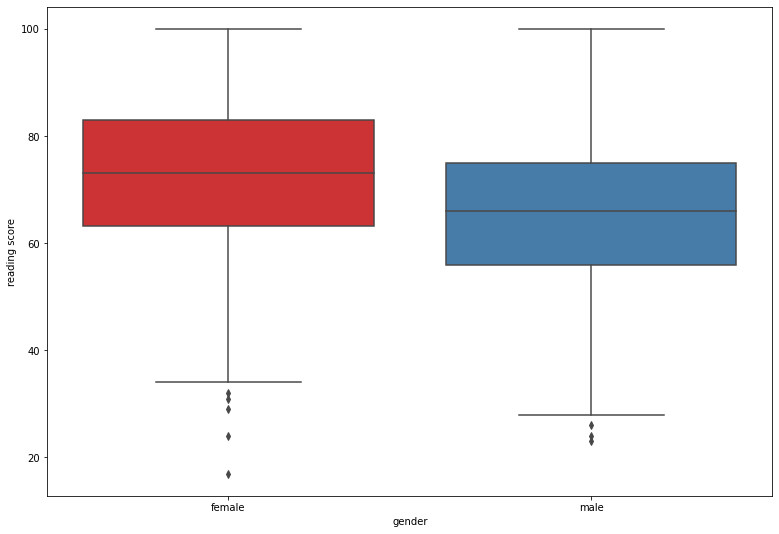

In [49]:
# Checking for outliers 2

plt.figure(figsize=(13, 9))
sns.boxplot(x="gender", y="reading score", data=df1, palette="Set1") 
plt.show()

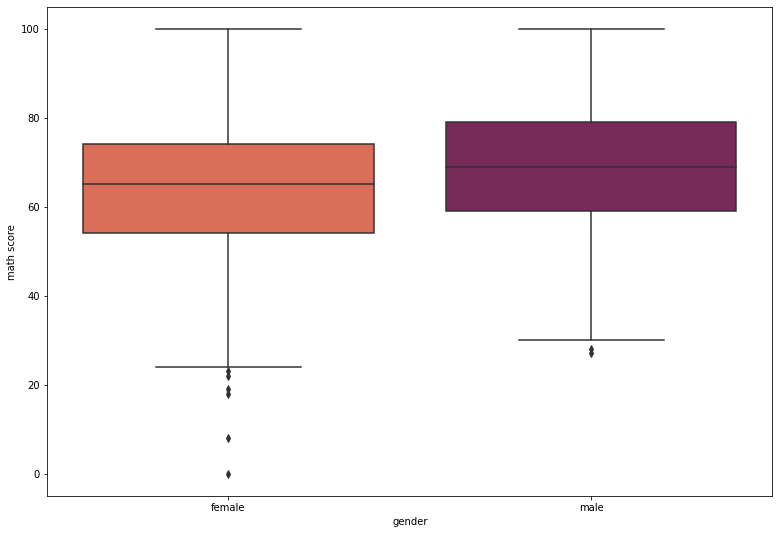

In [48]:
# Checking for outliers 3
plt.figure(figsize=(13, 9))
sns.boxplot(x="gender", y="math score", data=df1, palette="rocket_r")
plt.show()

### Test For Outliers In The Dataset:
- From the above outliers test, it is found that there are some outliers in the dataset as some of the students have scored below 40 marks in the above three tests.  

### Relationship Analysis:

In [27]:
correlation = df1.corr()
correlation

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


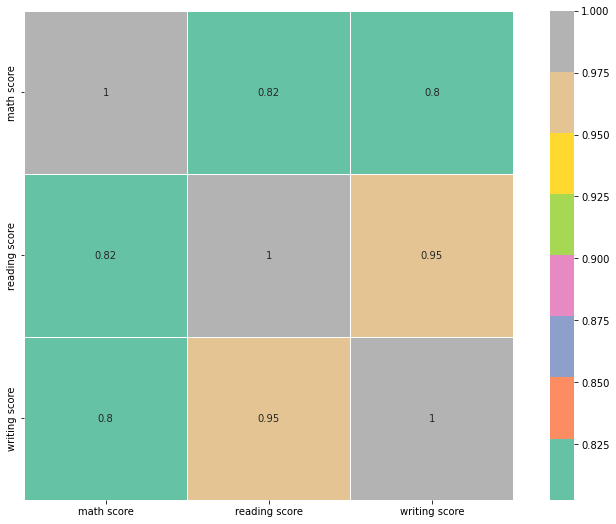

In [29]:
# Heatmap

plt.figure(figsize=(13, 9))
sns.heatmap(data=correlation, square=True, annot=True, cmap="Set2", linewidths=0.5)
plt.show()

- Hence, there is a strong correlation in the above three test scores.

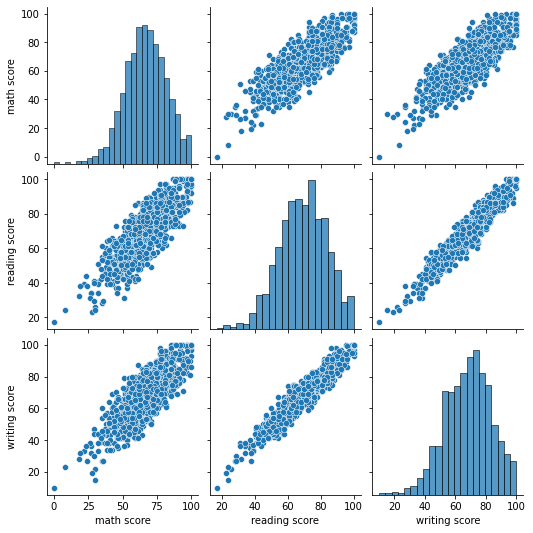

In [32]:
# Plotting Pairplot

sns.pairplot(df1)
plt.show()

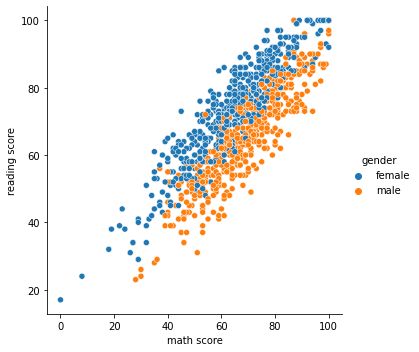

In [37]:
# Relation plot

sns.relplot(x="math score", y="reading score", hue="gender", data=df1)
plt.show()

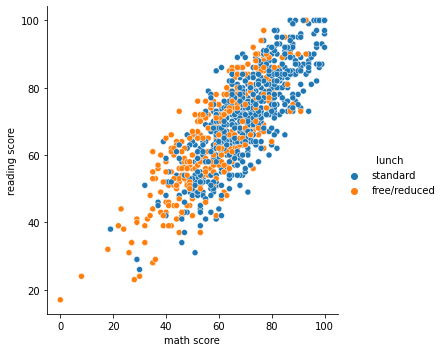

In [38]:
# Relation plot 2

sns.relplot(x="math score", y="reading score", hue="lunch", data=df1)
plt.show()

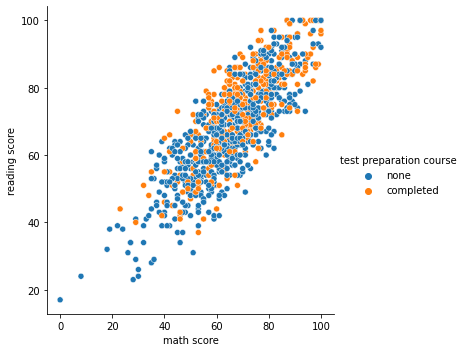

In [39]:
# Relation plot 3

sns.relplot(x="math score", y="reading score", hue="test preparation course", data=df1)
plt.show()

c:\Users\cw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


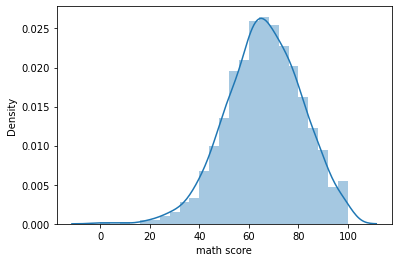

In [42]:
# Checking the normality of the math score column data

sns.distplot(df1["math score"])
plt.show()

c:\Users\cw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

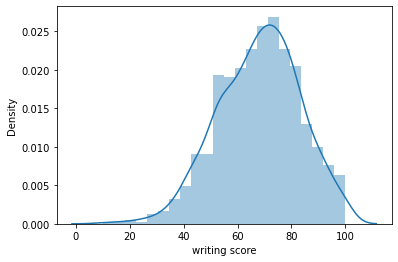

In [43]:
# Cheecking the normality of the writing score column data

sns.distplot(df1['writing score'])
plt.plot()

c:\Users\cw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


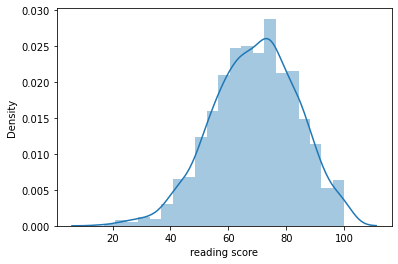

In [45]:
# Checking the normality of reading score column data

sns.distplot(df1["reading score"])
plt.show()

- The data is fairly normal and the shape is skewed towards left because of the outliers in the data as there are some students who have scored below 40 marks in three tests.
- By removing those outliers we can get much more bell shaped curve for the above data.

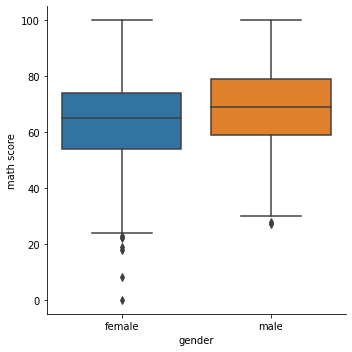

In [47]:
# Categorical plot

sns.catplot(x="gender", y="math score", kind="box", data=df1)

## Conclusion:
- In the Above Exploratory Data Analysis, it is established that there is a strong relationship among *math score*, *reading score* and *writing score*.
- From the above it is also established that the students who have taken test preparation course have performed comparitively better than thsoe who have not taken the course.
- From the above analysis, it is also established that male students performance is more balanced as compared to female students.
- From the above analysis, it is also established that there are some outliers in the data that can cause disruptuions while making analysis and building models due to the fact that some students have scored less than 40 marks. 